### Import your dependencies

In [1]:
from twitter import *
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import advertools as adv
import sys, os
from collections import Counter
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
import itertools
from config import access_token, access_token_secret, api_key, api_secret

### OAuth dance

In [2]:
t = Twitter(
    auth=OAuth(access_token, access_token_secret, api_key, api_secret))
print(t)

### "where on earth identifier" or WOEID

In [3]:
# See https://dev.twitter.com/docs/api/1.1/get/trends/place
#which is a legacy identifier created by Yahoo and has been deprecated. Twitter API v1.1 still uses the numeric value to identify town and country trend locations.

WORLD_WOE_ID = 1
MX_WOE_ID = 23424900

world_trends = t.trends.place(_id=WORLD_WOE_ID)
mx_trends = t.trends.place(_id=MX_WOE_ID)

### Convert our World Trending Topics into JSON format

In [4]:
#JSON conversion
import json
world_json_trends=json.dumps(world_trends, indent=1)
print(world_json_trends)

[
 {
  "trends": [
   {
    "name": "Flores",
    "url": "http://twitter.com/search?q=Flores",
    "promoted_content": null,
    "query": "Flores",
    "tweet_volume": 132911
   },
   {
    "name": "#CONFERENZASTAMPA",
    "url": "http://twitter.com/search?q=%23CONFERENZASTAMPA",
    "promoted_content": null,
    "query": "%23CONFERENZASTAMPA",
    "tweet_volume": 14186
   },
   {
    "name": "#FBvADS",
    "url": "http://twitter.com/search?q=%23FBvADS",
    "promoted_content": null,
    "query": "%23FBvADS",
    "tweet_volume": null
   },
   {
    "name": "#TeamGhana",
    "url": "http://twitter.com/search?q=%23TeamGhana",
    "promoted_content": null,
    "query": "%23TeamGhana",
    "tweet_volume": 47567
   },
   {
    "name": "#THESECONDSTEP_CHAPTERONE",
    "url": "http://twitter.com/search?q=%23THESECONDSTEP_CHAPTERONE",
    "promoted_content": null,
    "query": "%23THESECONDSTEP_CHAPTERONE",
    "tweet_volume": 645551
   },
   {
    "name": "#1stMINIALBUM",
    "url": "http://t

### List comprenhension to iterate over the JSON

In [5]:
#itearate over the json to get the trend list and the tweet volume
world_trends_list = [trend['name'] 
                        for trend in world_trends[0]['trends']]

world_trending_volume =[trend['tweet_volume'] 
                        for trend in world_trends[0]['trends']]

print(world_trends_list, world_trending_volume)

['Flores', '#CONFERENZASTAMPA', '#FBvADS', '#TeamGhana', '#THESECONDSTEP_CHAPTERONE', '#1stMINIALBUM', 'Ana Clara', 'Dolphins', 'Rafa Kalimann', 'Morocco', 'Acuña', 'Joe Judge', 'Mert Hakan', 'Fresh Prince', 'Gökhan İnler', 'Grier', 'Stephen Ross', 'Belhanda', 'Boufal', 'Berke', 'Christopher Acosta', 'Ayew', 'Pelkas', 'İrfan', 'Boninho', '打順と守備位置', 'Harbaugh', 'Umtiti', 'Camilla', 'Maroc', 'Giants', 'Clay Aiken', 'Watson', 'John Mara', 'Jim Jordan', 'Visual King Jungkook', 'Partey', 'Halil Umut Meler', '古謝くん', 'Zynga', 'NasaDoge AjdaPekkanNFT', 'Plutão', 'Valencia', 'Galatasaray', 'Etec', 'Ken Dsuper1or', '関東人失格', '地下鉄ロゴクイズ', 'Uncle Phil', 'Senegal'] [132911, 14186, None, 47567, 645551, 603043, 11092, 88653, 10143, 31749, 30511, 39304, None, None, None, 11339, None, None, None, None, 12055, 11354, None, None, 21645, None, 22052, 37712, 10412, 18812, 126409, None, 26353, None, 125675, 54923, None, None, None, None, None, None, 39613, 88952, None, 12374, None, None, None, 62516]


### Create a dictionary

In [6]:
#The following step is to create a dictionary, so we can create a DataFrame.
world_data ={"Trend_name":world_trends_list,"Tweet_volume":world_trending_volume}
#print(data)

### Create a DataFrame out of the previous dictionary

In [7]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
world_df =pd.DataFrame(world_data)
world_df.head(6)

,Trend_name,Tweet_volume
0,Flores,132911.0
1,#CONFERENZASTAMPA,14186.0
2,#FBvADS,NaN
3,#TeamGhana,47567.0
4,#THESECONDSTEP_CHAPTERONE,645551.0
5,#1stMINIALBUM,603043.0


### Convert our MX Trending Topics into JSON format

In [8]:
#JSON conversion
mx_json_trends=json.dumps(mx_trends, indent=1)
print(world_json_trends)

[
 {
  "trends": [
   {
    "name": "Flores",
    "url": "http://twitter.com/search?q=Flores",
    "promoted_content": null,
    "query": "Flores",
    "tweet_volume": 132911
   },
   {
    "name": "#CONFERENZASTAMPA",
    "url": "http://twitter.com/search?q=%23CONFERENZASTAMPA",
    "promoted_content": null,
    "query": "%23CONFERENZASTAMPA",
    "tweet_volume": 14186
   },
   {
    "name": "#FBvADS",
    "url": "http://twitter.com/search?q=%23FBvADS",
    "promoted_content": null,
    "query": "%23FBvADS",
    "tweet_volume": null
   },
   {
    "name": "#TeamGhana",
    "url": "http://twitter.com/search?q=%23TeamGhana",
    "promoted_content": null,
    "query": "%23TeamGhana",
    "tweet_volume": 47567
   },
   {
    "name": "#THESECONDSTEP_CHAPTERONE",
    "url": "http://twitter.com/search?q=%23THESECONDSTEP_CHAPTERONE",
    "promoted_content": null,
    "query": "%23THESECONDSTEP_CHAPTERONE",
    "tweet_volume": 645551
   },
   {
    "name": "#1stMINIALBUM",
    "url": "http://t

### List comprenhension to iterate over the JSON

In [9]:
#itearate over the json to get the trend list and the tweet volume
mx_trends_list = [trend['name'] 
                        for trend in mx_trends[0]['trends']]

mx_trending_volume =[trend['tweet_volume'] 
                        for trend in mx_trends[0]['trends']]

print(mx_trends_list, mx_trending_volume)

['#FelizLunes', '#Disciplina', 'Nicaragua', '#KOREAQUEST_JISOO', 'Irresponsable', '#FelizInicioDeSemana', '#OigoPoderoso', 'Daniel Ortega', 'Kings of Convenience', 'SEOUL', 'Brian Flores', 'Anaya', 'Umtiti', 'Centroamérica', 'El Presidente', 'Ricardo Monreal', 'Gabriela Mistral', 'Día 10', 'Hitman', 'Ebrard', 'Lunes 10', 'Novak Djokovic', 'Pascal', 'Abierto de Australia', 'Rápido y Furioso', 'El Chapo', 'Barinas', 'Aeroméxico', '#KornoConFrenoDeMano', '#IlanaYMike', '#ElCovidVaPorLosNiños', '#REC2022', '#BuenLunes', '#3YearsWithYeonjun', '#TOTY', '#YLasMedicinas', '#THESECONDSTEP_CHAPTERONE', '#1stMINIALBUM', '#티일사일구', '#LunesDeMotivacion', '#Los9000DeMaquina', '#Mañanera', '#T1419', '#MondayMotivation', '#BY_SUGA', '#Columna', '#UDLAP'] [18016, None, 50638, 12152, 21597, None, None, 31986, None, 116733, 48229, 12402, 37712, None, 152349, None, None, 49671, None, 18771, 25733, 202506, 12336, None, 27025, 16850, 351247, None, None, None, None, None, None, None, None, None, 645551, 60304

In [10]:
#The following step is to create a dictionary, so we can create a DataFrame.
mx_data ={"Trend_name":mx_trends_list,"Tweet_volume":mx_trending_volume}
#print(data)

In [11]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
mx_df=pd.DataFrame(mx_data)
mx_df.head(5)

,Trend_name,Tweet_volume
0,#FelizLunes,18016.0
1,#Disciplina,NaN
2,Nicaragua,50638.0
3,#KOREAQUEST_JISOO,12152.0
4,Irresponsable,21597.0


### Get the statutes/tweets

In [12]:
q = '#Bitcoin' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets
search_results = t.search.tweets(q=q, count=count)

#print(search_results)

#access to statuses
statuses = search_results['statuses']

print(search_results)

{'statuses': [{'created_at': 'Mon Jan 10 18:10:20 +0000 2022', 'id': 1480602926636802053, 'id_str': '1480602926636802053', 'text': 'WHAT IF there are no good #Bitcoin critics because we are are right? 🤔 https://t.co/A7Ds2b7opz', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/A7Ds2b7opz', 'expanded_url': 'https://twitter.com/WhatBitcoinDid/status/1471882703373012992', 'display_url': 'twitter.com/WhatBitcoinDid…', 'indices': [71, 94]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1464643793181974528, 'id_str': '1464643793181974528', 'name': 'Orphan Ƀlock', 'screen_name': 'bock_orphan2', 'l

In [13]:
print(search_results)

{'statuses': [{'created_at': 'Mon Jan 10 18:10:20 +0000 2022', 'id': 1480602926636802053, 'id_str': '1480602926636802053', 'text': 'WHAT IF there are no good #Bitcoin critics because we are are right? 🤔 https://t.co/A7Ds2b7opz', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/A7Ds2b7opz', 'expanded_url': 'https://twitter.com/WhatBitcoinDid/status/1471882703373012992', 'display_url': 'twitter.com/WhatBitcoinDid…', 'indices': [71, 94]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1464643793181974528, 'id_str': '1464643793181974528', 'name': 'Orphan Ƀlock', 'screen_name': 'bock_orphan2', 'l

### Get the latest tweets

In [14]:
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break### Get the statutes/tweets
    
    #print(next_results) #para ver el último nextresult
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23Bitcoin&count=100&include_entities=1
    # you are creating a dictionary and by kv.split(=) you are creating key-value pairs
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    print(kwargs)
    
    search_results = t.search.tweets(**kwargs)
    statuses += search_results['statuses']
    print(statuses)

Length of statuses 89
{'max_id': '1480602818218274820', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}
[{'created_at': 'Mon Jan 10 18:10:20 +0000 2022', 'id': 1480602926636802053, 'id_str': '1480602926636802053', 'text': 'WHAT IF there are no good #Bitcoin critics because we are are right? 🤔 https://t.co/A7Ds2b7opz', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/A7Ds2b7opz', 'expanded_url': 'https://twitter.com/WhatBitcoinDid/status/1471882703373012992', 'display_url': 'twitter.com/WhatBitcoinDid…', 'indices': [71, 94]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1464643793

[{'created_at': 'Mon Jan 10 18:10:20 +0000 2022', 'id': 1480602926636802053, 'id_str': '1480602926636802053', 'text': 'WHAT IF there are no good #Bitcoin critics because we are are right? 🤔 https://t.co/A7Ds2b7opz', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/A7Ds2b7opz', 'expanded_url': 'https://twitter.com/WhatBitcoinDid/status/1471882703373012992', 'display_url': 'twitter.com/WhatBitcoinDid…', 'indices': [71, 94]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1464643793181974528, 'id_str': '1464643793181974528', 'name': 'Orphan Ƀlock', 'screen_name': 'bock_orphan2', 'location': '',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Get all the status text, screen names, hastags and words

In [15]:
#get the statuses
status_text = [status['text'] 
                 for status in statuses]
#get the screen names
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
#get the hastags
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_text 
              for w in t.split() ]

### Create a list that contains the word and its count up to the first ten elements

In [16]:
#from collections import Counter
for item in [status_text, screen_names, hashtags, words]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT @Cryptoahbap: Evet #bitcoin sayesinde milyoner olan genç bir arkadaşınız olarak 3 bin takipçi sayısını geçtim ve söz verdiğim gibi çekil…', 12), ("RT @cryptolegennd: Çekiliş Zamanı 🥳🥳\n\n1 Kişiye 5000 TL 🤑🤑\n\nŞartlar : Rt + Fav + Hesabı Takip\n\nSonuçlar: 20.01.2022'de açıklanacaktır \n\n#bit…", 6), ('RT @saylor: "Be the change you wish to see in the world." - Gandhi on #Bitcoin', 5), ('RT @JobPreference: NEED a JOB?\nSign up now https://t.co/rMErDJMv4h\nFREE. NO MIDDLEMEN\n#Job #WomenWhoCode #Programming #Coding #gamers #indi…', 5), ('RT @leonarbuke: Daha önce de yapmıştım ama beklediğim kadar katılım olmamıştı bende ödülü büyüttüm.Bir kişiye iPhone 13 128 GB veya ÜCRETİN…', 5), ('RT @Kriptozenciii: Sana ihtiyacımız var İnce mehmet sen bize çok direnc atlattın Sana inanılmaz ihtiyacımız var #bitcoin #btcusd https://t.…', 5), ("RT @MayfairMethod: Well - @100trillionUSD #PlanB didn't like being shown how to do it! Reached out and offered some guidance for #bitcoin #…", 5), ('RT @

### Clean *stop words* from words

In [17]:
#import nltk
#from nltk.corpus import stopwords  
#from nltk.tokenize import word_tokenize

stopwords = (["have", "has", "this", "are", "as", "-", "|", "A", "is", "me", "you", 'I', 'will', "on",":","to","+","be","1", "of", "in", "the", "for", "The", "at", "and", "La", "En", "http…", "??..", "https://t.co/", "Y", "y", "nos", "esta", "está", "o", "sus", "este", "por", "Se", "RT", "RT ", "a", "con", "El", "un", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

filterwords= [w for w in words if not w in stopwords]

In [18]:
for item in [screen_names, hashtags, filterwords]:
    c=Counter(item)
    print(c.most_common()[:10])
    print()

[('BitcoinMagazine', 19), ('Cryptoahbap', 12), ('Kriptozenciii', 12), ('saylor', 10), ('BTC_Archive', 9), ('borsaparatic', 7), ('cryptolegennd', 6), ('scottmelker', 6), ('DocumentingBTC', 6), ('JobPreference', 5)]

[('Bitcoin', 197), ('bitcoin', 92), ('crypto', 20), ('BTC', 16), ('Binance', 13), ('cryptocurrency', 12), ('Airdrop', 12), ('btc', 11), ('Ethereum', 11), ('shiba', 10)]

[('#Bitcoin', 182), ('#bitcoin', 85), ('ve', 32), ('with', 29), ('your', 22), ('13', 19), ('@BitcoinMagazine:', 19), ('up', 18), ('Bitcoin', 18), ('bir', 18)]



In [19]:
for item in [filterwords]:
    c = Counter(item)
    clean_filterwords=pd.DataFrame(c.most_common()[:10])
    clean_filterwords.columns=["Words","Count"]
clean_filterwords

,Words,Count
0,#Bitcoin,182
1,#bitcoin,85
2,ve,32
3,with,29
4,your,22
5,13,19
6,@BitcoinMagazine:,19
7,up,18
8,Bitcoin,18
9,bir,18


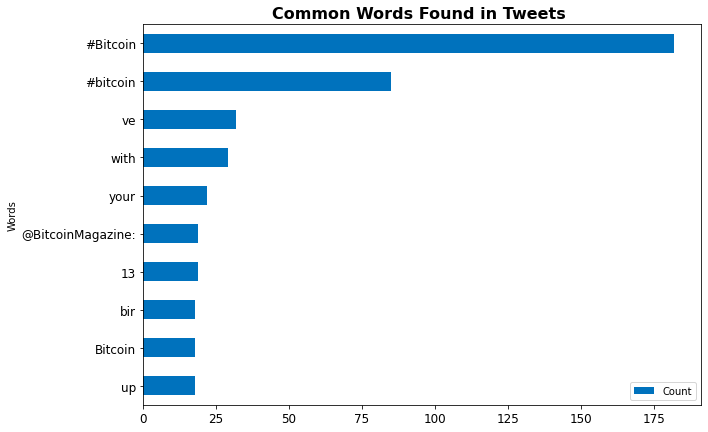

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_filterwords.sort_values(by='Count').plot.barh(x='Words',
                      y='Count',
                      ax=ax,
                      color="#0072BD")

ax.set_title("Common Words Found in Tweets ", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [21]:
for item in [screen_names]:
    c = Counter(item)
    clean_screennames=pd.DataFrame(c.most_common()[:10])
    clean_screennames.columns=["Screen Names","Count"]
clean_screennames

,Screen Names,Count
0,BitcoinMagazine,19
1,Cryptoahbap,12
2,Kriptozenciii,12
3,saylor,10
4,BTC_Archive,9
5,borsaparatic,7
6,cryptolegennd,6
7,scottmelker,6
8,DocumentingBTC,6
9,JobPreference,5


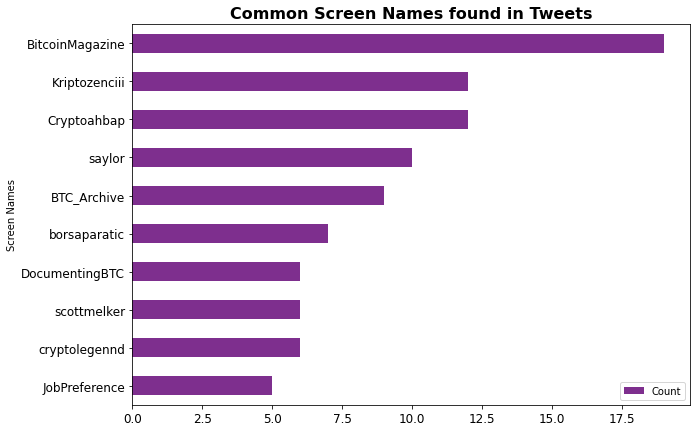

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_screennames.sort_values(by='Count').plot.barh(x='Screen Names',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Screen Names found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [23]:
for item in [hashtags]:
    c = Counter(item)
    clean_hastags=pd.DataFrame(c.most_common()[:10])
    clean_hastags.columns=["Hashtags","Count"]
clean_hastags

,Hashtags,Count
0,Bitcoin,197
1,bitcoin,92
2,crypto,20
3,BTC,16
4,Binance,13
5,cryptocurrency,12
6,Airdrop,12
7,btc,11
8,Ethereum,11
9,shiba,10


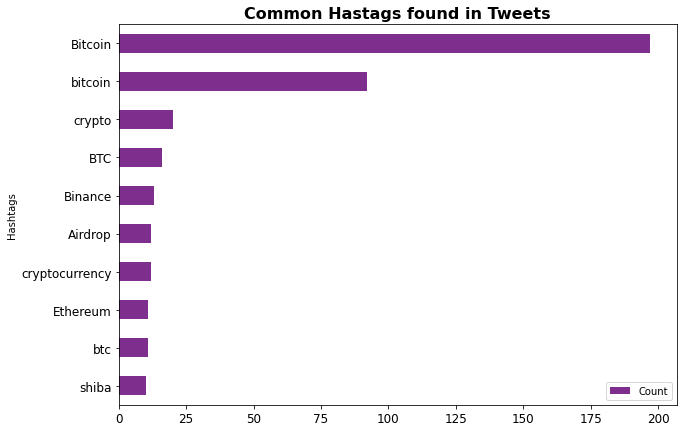

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_hastags.sort_values(by='Count').plot.barh(x='Hashtags',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Hastags found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

### Create a dataframe that shows the most retweeted statuses

In [25]:
#import itertools

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['retweeted_status']['created_at'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

retweets.sort(reverse=True)
pd3=pd.DataFrame(list(retweets for retweets,_ in itertools.groupby(retweets)))
pd3.columns=["Retweet Count", "Screen Name", "Tweet ID", "Created At", "Text"]
pd3.head(6)

,Retweet Count,Screen Name,Tweet ID,Created At,Text
0,16025,IbaxNetwork,1456463184110497833,Fri Nov 05 03:27:37 +0000 2021,RT @IbaxNetwork: #IBAX #Airdrop is coming next...
1,4999,Cryptoahbap,1480246052024430595,Sun Jan 09 18:32:15 +0000 2022,RT @Cryptoahbap: Evet #bitcoin sayesinde milyo...
2,4115,leonarbuke,1480281026291249164,Sun Jan 09 20:51:13 +0000 2022,RT @leonarbuke: Daha önce de yapmıştım ama bek...
3,2649,Pastore1314,1480165281993564161,Sun Jan 09 13:11:18 +0000 2022,RT @Pastore1314: #Bitcoin at 40K in 2021/2022 ...
4,1625,MMCrypto,1479424760358621186,Fri Jan 07 12:08:43 +0000 2022,RT @MMCrypto: Nothing stops #Bitcoin! https://...
5,1107,DocumentingBTC,1480151436407328774,Sun Jan 09 12:16:16 +0000 2022,RT @DocumentingBTC: Satoshi Nakamoto programme...


In [26]:
emoji_summary = adv.extract_emoji(pd3['Text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [27]:
emoji_summary["overview"]["num_emoji"]

162

In [28]:
emoji_list=emoji_summary["top_emoji"][:11]
emoji_list

[('🚀', 18),
 ('🔥', 8),
 ('✅', 6),
 ('🚨', 5),
 ('🎁', 5),
 ('⏰', 5),
 ('🎇', 4),
 ('😂', 4),
 ('😍', 4),
 ('💥', 3),
 ('🤑', 3)]

In [29]:
emoji_df=pd.DataFrame(emoji_list)
emoji_df.rename(columns={0:'Emoji',1:'Count'},inplace=True)
emoji_df

,Emoji,Count
0,🚀,18
1,🔥,8
2,✅,6
3,🚨,5
4,🎁,5
5,⏰,5
6,🎇,4
7,😂,4
8,😍,4
9,💥,3


There are 26675 words in the combination of all review.


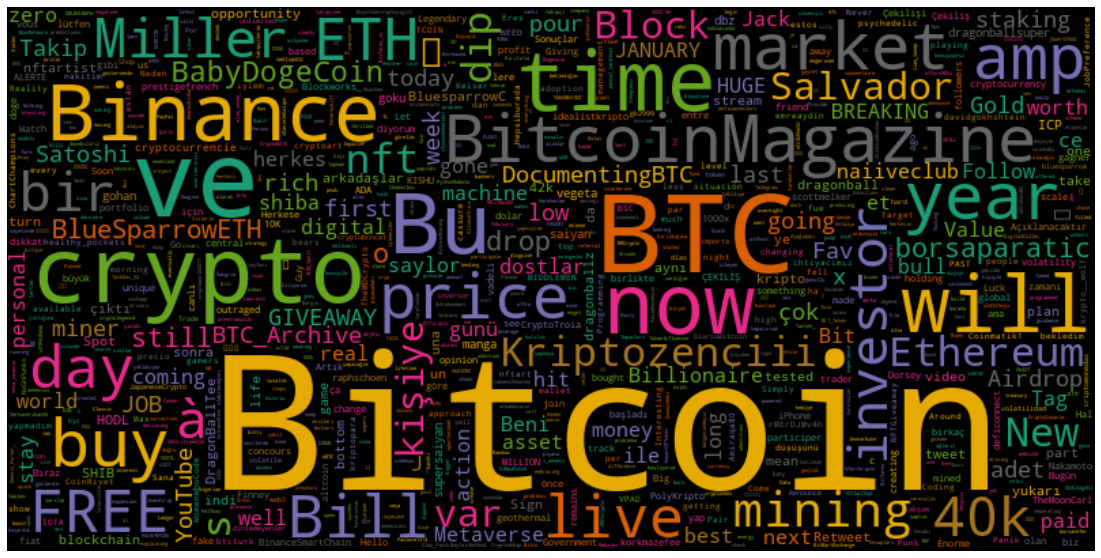

In [30]:
import os
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)


# Read the whole text.
text = " ".join(review for review in pd3.Text)

stopwords = set(STOPWORDS)

stopwords.update(["RT", "e", "RT ", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

print ("There are {} words in the combination of all review.".format(len(text)))


# Generate a word cloud image

wordcloud = WordCloud(colormap="Dark2", background_color="black", stopwords=stopwords, max_words=2000, collocations=False, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
import string# image.show()

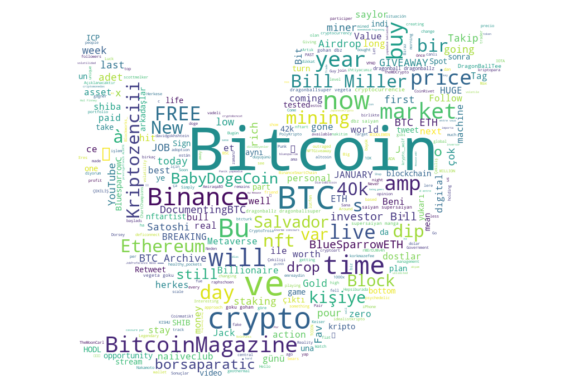

In [31]:
# Para este código, la imagen debe de tener un fondo blanco

# Create a word cloud image

twitter_mask = np.array(Image.open("resources/twitter.jpg"))

wc = WordCloud(background_color="white", max_words=4000, mask=twitter_mask,
               stopwords=stopwords, contour_width=2, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("resources/twitter1.png")

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Read the whole text.
text =  " ".join(review for review in pd3.Text)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
mask = np.array(Image.open("resources/bitcoin.jpg"))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=10000, mask=mask,contour_width=0, contour_color='orange',
               stopwords=stopwords)

# generate word cloud
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

In [ ]:
def sum(*args):
    value = 0
    for n in args:
        value = value+n
    return value

In [ ]:
sum(2,5)